In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
w0 = 0.3
w1 = -1
w2 = 2

def fun(x1, x2, w0=w0, w1=w1, w2=w2):
    return w1*x1+w2*x2-w0
    
def w_test(x1, x2, w0=w0, w1=w1, w2=w2):
    return -1 if fun(x1, x2, w0, w1, w2) < 0 else 1

class Point:
    def __init__(self):
        self.x1 = np.random.random()
        self.x2 = np.random.random()
        self.color = 'r' if w_test(self.x1, self.x2) == -1 else 'b'

    def get_cord(self):
        return self.x1, self.x2

    def get_y(self):
        return w_test(self.x1, self.x2)
        
    def plot(self):
        plt.scatter(self.x1, self.x2, color = self.color)
        
X = [Point() for _ in range(100)]

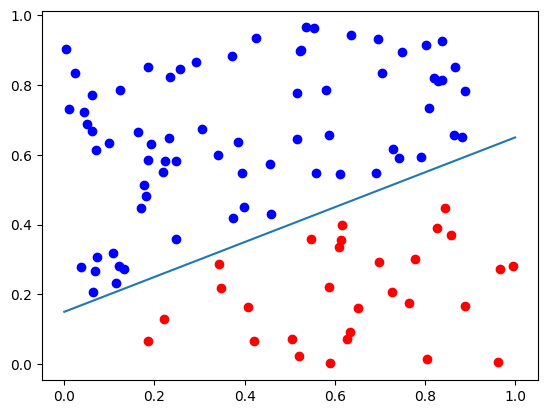

In [69]:
t = np.linspace(0, 1, 100)
plt.plot(t, w0/w2-t*w1/w2)
for x in X:
    x.plot()

In [70]:
eps = 0.025

In [71]:
X_red = [x for x in X if w_test(*x.get_cord(), w0, w1, w2) == -1]
X_blue = [x for x in X if w_test(*x.get_cord(), w0, w1, w2) == 1]

In [72]:
w1*w1+w2*w2

5

In [73]:
delta = [-1*fun(*x.get_cord(), w0, w1, w2) for x in X_red]
np.min(delta)

0.07028100493797856

In [74]:
delta = [1*fun(*x.get_cord(), w0, w1, w2) for x in X_blue]
np.min(delta)

0.04963111291718586

$$\begin{cases}
\langle w, w \rangle \to \min; \\
y_i \cdot(\langle x , w\rangle - w_0 ) \geq 1
\end{cases}$$

$$\begin{cases}
L(w, w_0; \lambda) = \frac{1}{2} \langle w, w \rangle - \sum_{i=1}^{l}\lambda_i (y_i \cdot(\langle x , w\rangle - w_0 ) - 1) \to \min_{w, w_0} \max_{\lambda} \\
\lambda_i \geq 0, \quad i = 1, ..., l \\
\lambda_i = 0 \text{ либо }  y_i = \langle x , w\rangle - w_0, \quad i = 1, ..., l
\end{cases}$$

Необходимые условия

$$\frac{\partial L}{\partial w} = w- \sum_{i=1}^{l} \lambda_i y_i x_i = 0$$
$$\frac{\partial L}{\partial w_0} = - \sum_{i=1}^{l} \lambda_i y_i =0$$

т.е.

$$w =  \sum_{i=1}^{l} \lambda_i y_i x_i$$
$$ \sum_{i=1}^{l} \lambda_i y_i =0$$

Из равенства 

$$w =  \sum_{i=1}^{l} \lambda_i y_i x_i$$

следует, что при суммирование участвуют вектора $x_i$, где $\lambda_i \neq 0$, а таковыми являются вектора на границе $y_i = \langle x , w\rangle - w_0$ (их как раз и называют опорными векторами) 


подставляем результаты

$$\begin{cases}
- L(\lambda) = - \sum_{i=1}^{l}\lambda_i + \frac{1}{2} \sum_{i=1}^{l} \sum_{j=1}^{l} \lambda_j y_j \lambda_i y_i \langle x_i, x_j \rangle  \to \min_{\lambda} \\
\lambda_i \geq 0, \quad i = 1, ..., l \\
\sum_{i=1}^{l} \lambda_i y_i =0
\end{cases}$$

Особенность задачи в том, что число опорных векторов $h<< l$

Пример алгоритма решения задачи INCAS - последовательный метод активных ограничений 

Fine S., Scheinberg K. INCAS: An incremental active set method for SVM: Tech.
rep.: 2002. http://citeseer.ist.psu.edu/fine02incas.html., 

Scheinberg K. An efficient implementation of an active set method for svms // J.
Mach. Learn. Res.  2006.  Vol. 7.  Pp. 2237–2257

Перепишем задачу в матричном виде

$$\begin{cases}
 \frac{1}{2} \lambda^T Q \lambda - e^T \lambda \to \min_{\lambda} \\
\lambda \geq 0, \quad i = 1, ..., l \\
y^T \lambda = 0;
\end{cases}$$

$e$ - вектор из единиц, $Q_{ij} = y_j y_i \langle x_i, x_j \rangle$

Можно выделить опорные и не опорные элементы

$I_O = \{ i: \lambda_i = 0\}$

$I_S = \{ i: \lambda_i > 0\}$

$$\begin{cases}
 \frac{1}{2} \lambda^T_S Q_{SS} \lambda_S - e^T_S \lambda_S \to \min_{\lambda} \\
y^T_S \lambda_S = 0;
\end{cases}$$

Для первого приближения решается задача, если обнаруживаются противоричия, то объект переводится из одного множество в другое.

Если $i\in I_S, \lambda_i \leq 0$, то объект переводится из $I_S$ в $I_O$

Если $i\in I_O, y_i(\langle w, x_i\rangle - w_0) \leq 1$, то объект переводится из $I_O$ в $I_S$

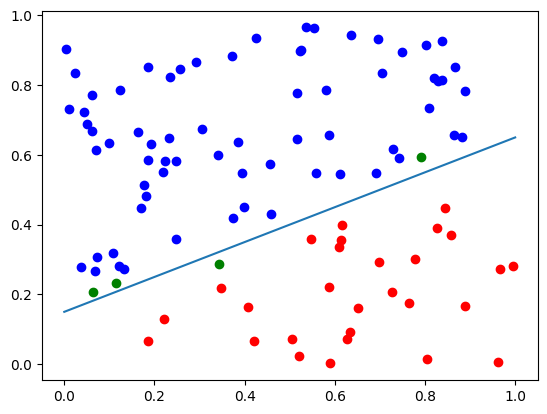

In [75]:
# Поиск опорных векторов
t = np.linspace(0, 1, 100)
plt.plot(t, w0/w2-t*w1/w2)
IS = []
for x in X:
    x1, x2 = x.get_cord()
    if abs(fun(x1, x2, w0=w0, w1=w1, w2=w2)) < 4*eps:
        IS.append(x)
        plt.scatter(x1, x2, color='g')
    else:
        x.plot()
    

In [89]:
def Q_ij(xi, xj):
    return (xi.x1*xj.x1+xi.x2*xj.x2)*w_test(xi.x1, xi.x2)*w_test(xj.x1, xj.x2)

Q = np.array([[Q_ij(xi, xj) for xi in IS] for xj in IS])
Y = np.array([w_test(xj.x1, xj.x2) for xj in IS] )

In [90]:
Q, Y

(array([[ 0.97783569,  0.22941289, -0.44079902,  0.17303696],
        [ 0.22941289,  0.06750319, -0.10620424,  0.05557892],
        [-0.44079902, -0.10620424,  0.19927583, -0.08105582],
        [ 0.17303696,  0.05557892, -0.08105582,  0.0470289 ]]),
 array([ 1,  1, -1,  1]))

array([ 1.26392324e+00+0.00000000e+00j,  2.77203666e-02+0.00000000e+00j,
       -4.53651496e-18+8.32119927e-18j, -4.53651496e-18-8.32119927e-18j])